In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [4]:
df = data.replace('Year', '', regex=True)
print(df)

     Year                    Major                University  Time   
0       2                  Physics  Indiana State University    12  \
1       3                Chemistry     Ball State University    14   
2       3                Chemistry         Butler University    12   
3       2                  Biology  Indiana State University    11   
4       3  Business Administration         Butler University    12   
...   ...                      ...                       ...   ...   
4995    2              Mathematics     Ball State University    11   
4996    3                Astronomy  Indiana State University    12   
4997    3                Chemistry         Butler University    13   
4998    3                Astronomy         Butler University    15   
4999    2                Economics  University of Notre Dame    15   

                                                  Order  
0                                  Fried Catfish Basket  
1                                       Sug

In [5]:
# Balance out all the answer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
# Split data
from sklearn.model_selection import train_test_split
# One hot encoding 
df_encoded = pd.get_dummies(df, columns=['Major', 'University'])

# Label the order
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_encoded["Order"] = encoder.fit_transform(df_encoded["Order"])


X = df_encoded.drop("Order", axis=1)
y = df_encoded.Order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print(X_res)

     Year  Time  Major_Accounting  Major_Anthropology  Major_Astronomy   
0     2.0    13             False               False            False  \
1     2.0    11             False               False             True   
2     3.0    13             False               False            False   
3     3.0    13             False               False            False   
4     2.0    13             False               False            False   
...   ...   ...               ...                 ...              ...   
3965  2.0    16             False               False            False   
3966  2.0    14             False               False             True   
3967  2.0    15             False               False            False   
3968  2.0    13             False               False             True   
3969  2.0    14             False               False             True   

      Major_Biology  Major_Business Administration  Major_Chemistry   
0             False                     

In [6]:
df_encoded.corr()

,Year,Time,Order,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,...,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
Year,1.000000,-0.015790,-0.114357,0.047852,-0.003375,0.048778,-0.047260,0.010074,-0.018105,0.022290,...,-0.114451,0.029854,0.041082,0.099749,-0.036922,0.018591,-0.015349,-0.013865,-0.072372,-0.027260
Time,-0.015790,1.000000,0.368199,-0.044945,-0.003604,0.039845,-0.000623,-0.016775,0.068795,-0.027592,...,-0.005755,-0.142009,0.004917,0.015282,0.074280,0.075046,0.015339,0.036665,0.155040,0.007810
Order,-0.114357,0.368199,1.000000,-0.072615,0.012056,0.004940,0.036111,-0.044732,0.018591,0.001198,...,0.104931,0.042671,-0.002585,-0.092577,0.070581,-0.123480,0.021991,-0.025528,0.119382,0.010275
Major_Accounting,0.047852,-0.044945,-0.072615,1.000000,-0.019433,-0.042119,-0.042738,-0.029979,-0.042931,-0.002746,...,-0.058989,0.019275,-0.001585,0.003159,-0.005496,0.039721,-0.001585,0.002459,-0.008489,0.037878
Major_Anthropology,-0.003375,-0.003604,0.012056,-0.019433,1.000000,-0.065191,-0.066149,-0.046401,-0.066447,-0.004249,...,-0.048074,-0.013031,-0.002453,0.034525,-0.008507,0.031446,-0.002453,0.013002,-0.008557,-0.007365
Major_Astronomy,0.048778,0.039845,0.004940,-0.042119,-0.065191,1.000000,-0.143368,-0.100568,-0.144014,-0.009210,...,0.000997,0.089860,-0.005316,-0.081573,-0.018437,-0.006072,-0.005316,0.004724,-0.024789,-0.001636
Major_Biology,-0.047260,-0.000623,0.036111,-0.042738,-0.066149,-0.143368,1.000000,-0.102046,-0.146131,-0.009345,...,0.007585,-0.028235,-0.005395,0.066617,-0.006432,-0.029076,-0.005395,-0.036616,-0.011809,-0.016197
Major_Business Administration,0.010074,-0.016775,-0.044732,-0.029979,-0.046401,-0.100568,-0.102046,1.000000,-0.102506,-0.006556,...,0.004901,0.007170,-0.003784,-0.062757,-0.013123,0.005700,-0.003784,-0.012267,0.135934,0.007536
Major_Chemistry,-0.018105,0.068795,0.018591,-0.042931,-0.066447,-0.144014,-0.146131,-0.102506,1.000000,-0.009388,...,0.040839,-0.040450,-0.005419,0.033292,-0.018792,-0.007493,-0.005419,-0.022641,-0.033761,0.011976
Major_Civil Engineering,0.022290,-0.027592,0.001198,-0.002746,-0.004249,-0.009210,-0.009345,-0.006556,-0.009388,1.000000,...,-0.012899,0.000552,-0.000347,0.003987,-0.001202,0.014059,-0.000347,-0.004204,-0.004219,-0.001040


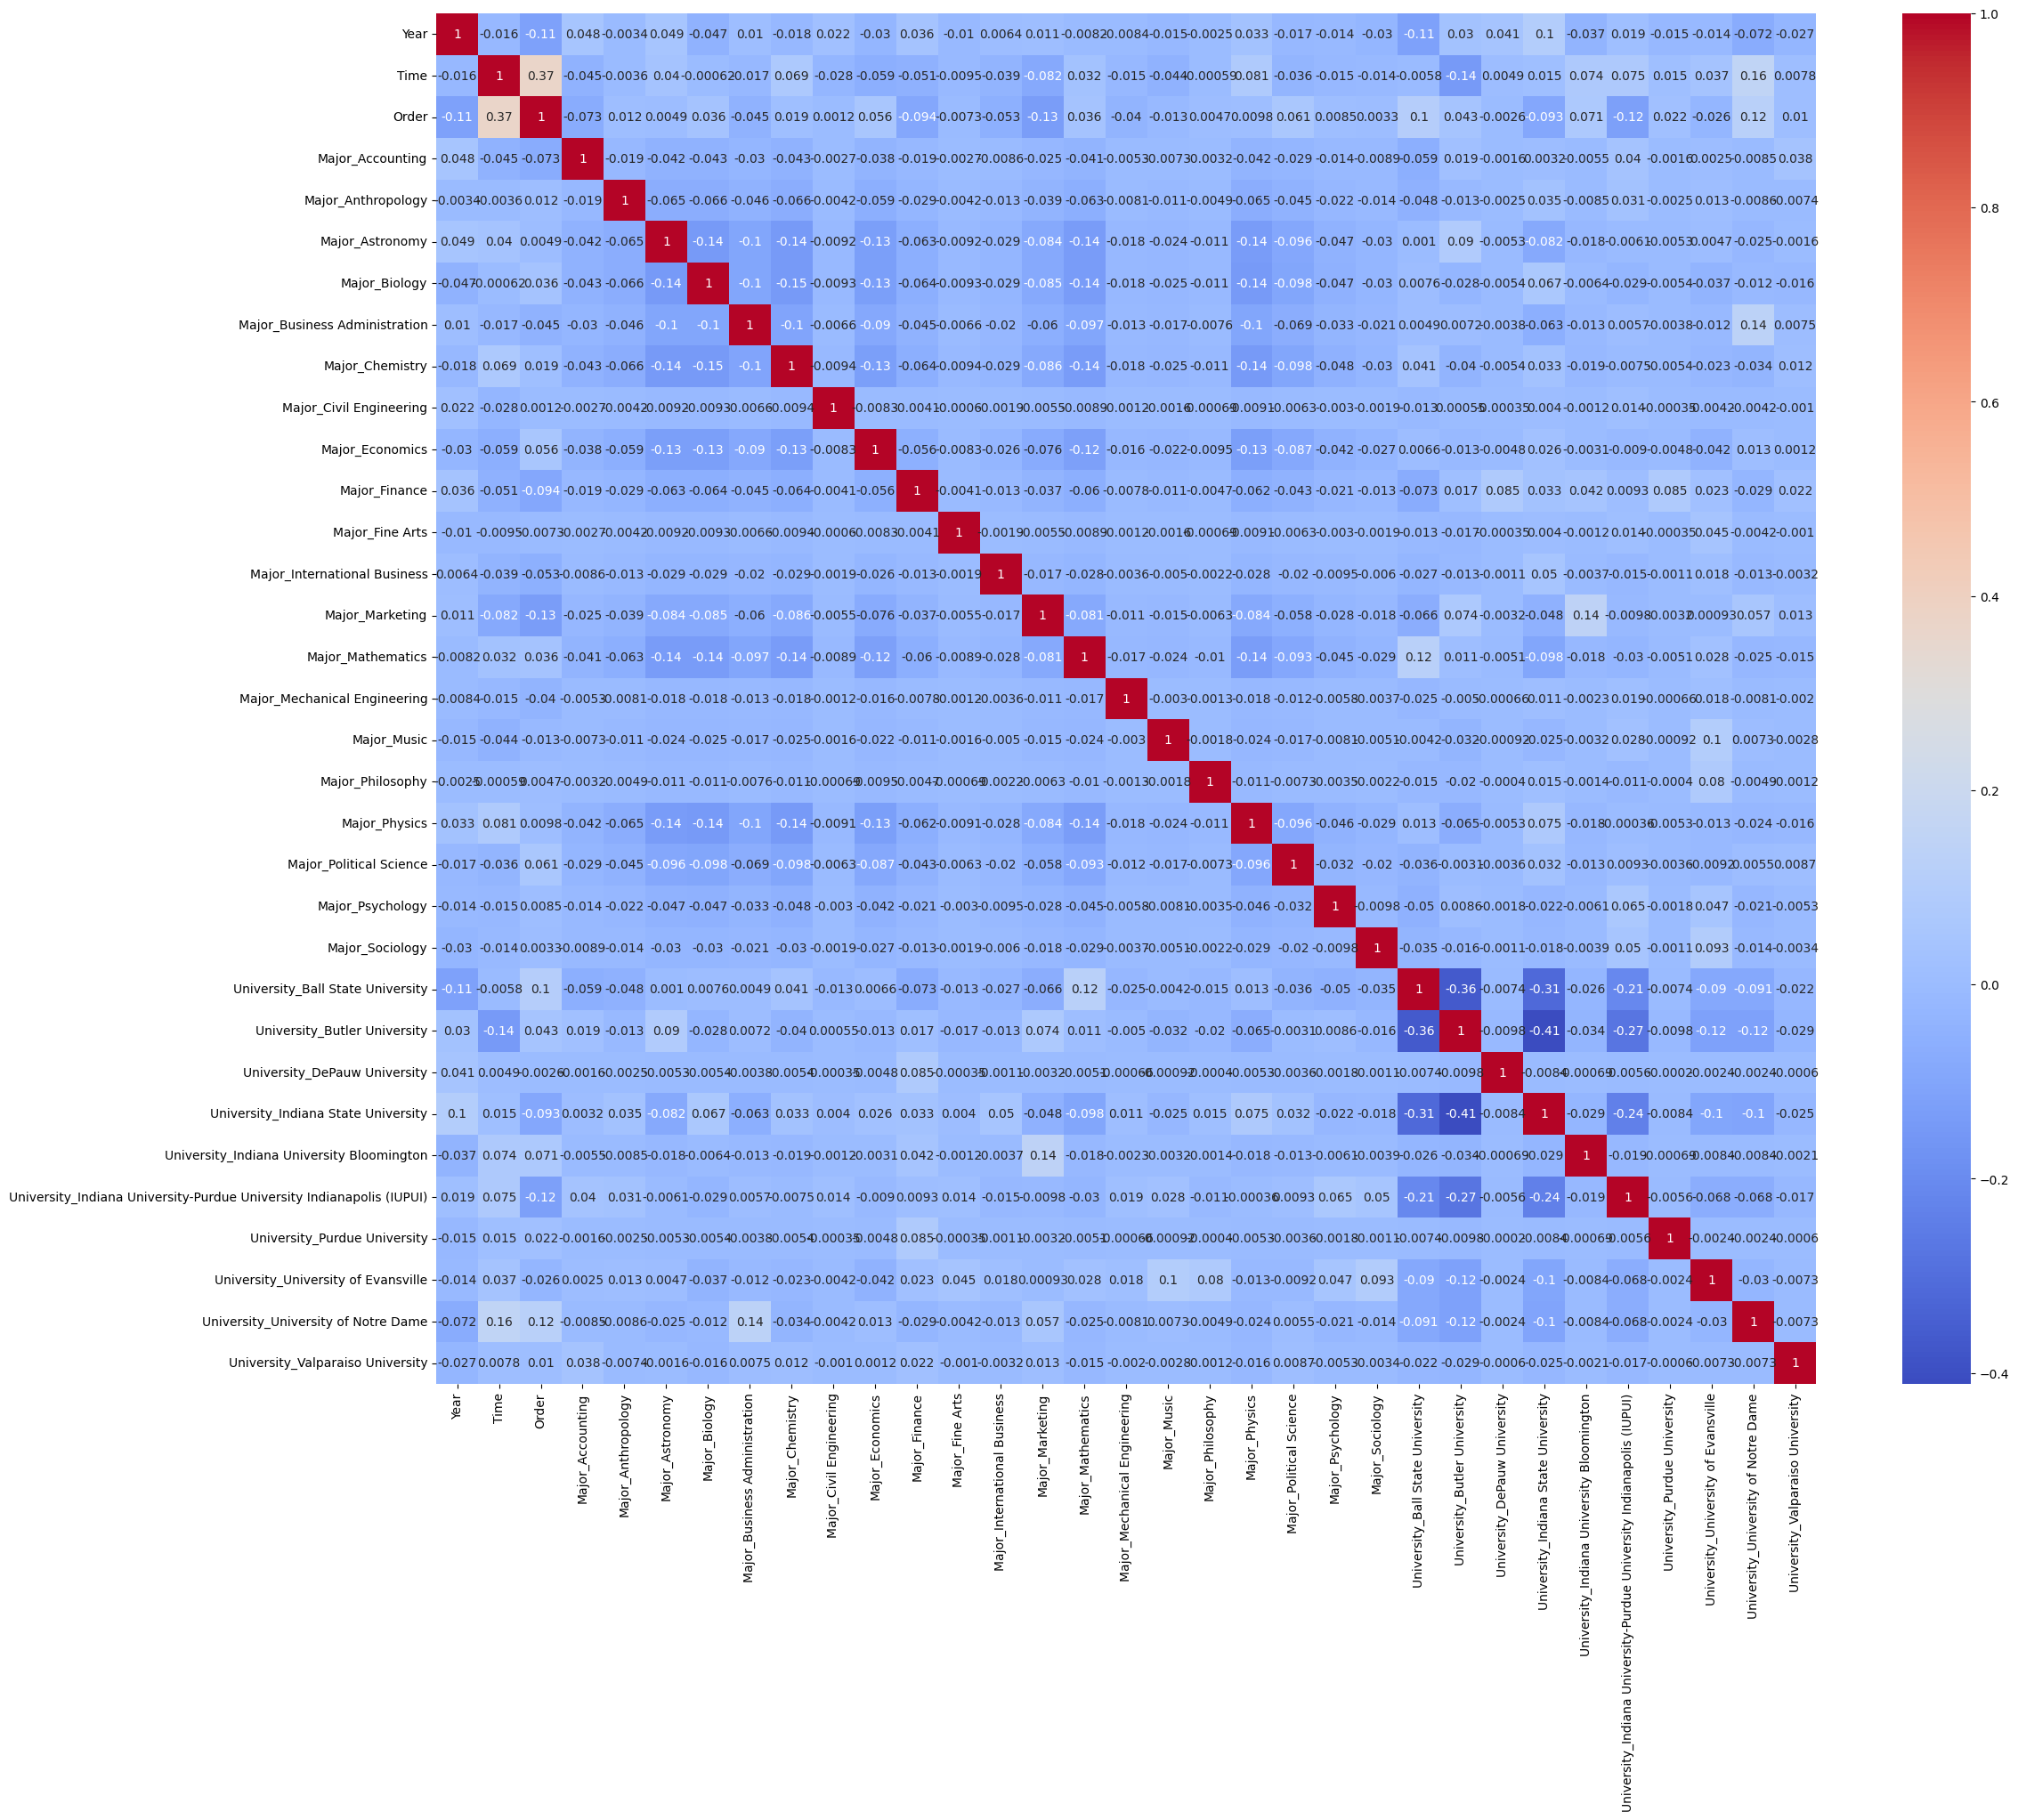

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_encoded.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
import numpy as np
corr_matrix = df_encoded.corr()

# Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation above a specified threshold (e.g., 0.7 or -0.7)
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.2)]

# Print the highly correlated pairs
for column in to_drop:
    print(column, upper[column][upper[column].abs() > 0.1].index.tolist())

Order ['Year', 'Time']
University_Butler University ['Time', 'University_Ball State University']
University_Indiana State University ['University_Ball State University', 'University_Butler University']
University_Indiana University-Purdue University Indianapolis (IUPUI) ['Order', 'University_Ball State University', 'University_Butler University', 'University_Indiana State University']


In [9]:
# Print unique values for each column
for col in X_res.columns:
    print(f"Unique values in {col}: {X_res[col].unique()}")

Unique values in Year: [2.0 3.0 4.0 1.0 2.3825184903722834 2.9093935654671794 2.4367117821544606
 2.3167364811745417 2.391060607573241 2.046450412719998 2.122038234844779
 2.921874235023117 2.0884925020519196 2.388677289689482 2.5680549813578843
 2.0205844942958024 2.767228659569696]
Unique values in Time: [13 11 14 12 10 16 15  9  8 17]
Unique values in Major_Accounting: [False  True]
Unique values in Major_Anthropology: [False  True]
Unique values in Major_Astronomy: [False  True]
Unique values in Major_Biology: [False  True]
Unique values in Major_Business Administration: [False  True]
Unique values in Major_Chemistry: [ True False]
Unique values in Major_Civil Engineering: [False  True]
Unique values in Major_Economics: [False  True]
Unique values in Major_Finance: [False  True]
Unique values in Major_Fine Arts: [False  True]
Unique values in Major_International Business: [False  True]
Unique values in Major_Marketing: [False  True]
Unique values in Major_Mathematics: [False  True]

In [10]:
unique_counts = X_res.nunique()

print(unique_counts)

Year                                                                    17
Time                                                                    10
Major_Accounting                                                         2
Major_Anthropology                                                       2
Major_Astronomy                                                          2
Major_Biology                                                            2
Major_Business Administration                                            2
Major_Chemistry                                                          2
Major_Civil Engineering                                                  2
Major_Economics                                                          2
Major_Finance                                                            2
Major_Fine Arts                                                          2
Major_International Business                                             2
Major_Marketing          

In [11]:
X_res

,Year,Time,Major_Accounting,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,Major_Economics,...,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
0,2.0,13,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2.0,11,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3.0,13,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,3.0,13,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2.0,13,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2.0,16,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3966,2.0,14,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3967,2.0,15,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3968,2.0,13,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


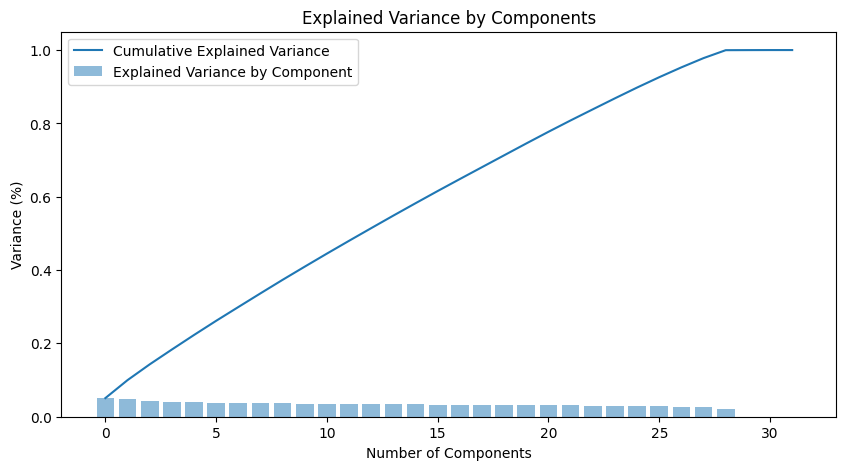

In [12]:
# Find the best number of components for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, label='Explained Variance by Component')
plt.plot(range(len(cumulative_variance)), cumulative_variance, label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance by Components')
plt.legend(loc='best')
plt.show()



In [13]:
n_components = np.argmax(cumulative_variance > 0.95) + 1
print(n_components)

27


In [14]:
pca_optimal = PCA(n_components=n_components)
X_pca = pca_optimal.fit_transform(X_scaled)
X_test_pca = pca_optimal.transform(scaler.transform(X_test))

In [15]:
#xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_pca, y_res)
y_pred = xgb.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))


0.66


In [16]:
print("Length of X_train" ,len(X_train))
print("Length of X_test" ,len(X_test))

Length of X_train 3750
Length of X_test 1250


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import numpy as np
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())
])

search_space = [
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': np.logspace(0, 4, 10)
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_features': ['sqrt', 'log2']
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': [0.001, 0.01, 0.1, 1]
    }
]
grid_search = GridSearchCV(pipeline, search_space, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_res, y_res)
print("Best model:", grid_search.best_estimator_)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=10, gamma=0.1))])
Best parameters: {'classifier': SVC(C=10, gamma=0.1), 'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.6662468513853904


Confusion Matrix:
[[53  7  4  3  2 17 10  7  2 17]
 [ 4 85  3  2 21  9  3 11  1  4]
 [ 7 11 81  1  4  2  4  1 13  6]
 [ 0  0  0 89 12  0  1  8 19  1]
 [ 2 11  3  8 67  5  0  4  3 10]
 [ 4  3  0  0  0 93  6  1  0  1]
 [ 5  3  1  0  1  0 99  1  0  3]
 [ 2  5  1 20  6  7  6 81  0  3]
 [ 1  6 17  7  3  1  4 15 72  8]
 [ 4  5  0  6  6  6  0  1  4 94]]


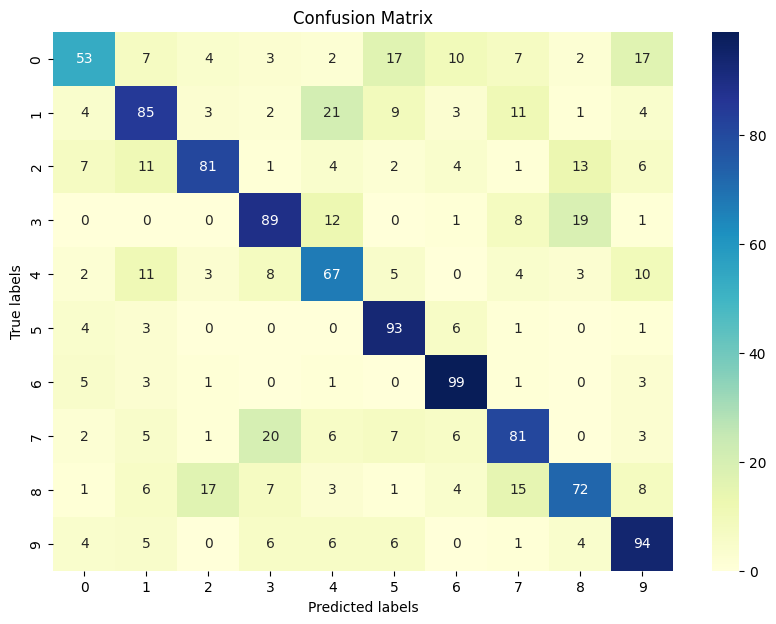

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.43      0.52       122
           1       0.62      0.59      0.61       143
           2       0.74      0.62      0.68       130
           3       0.65      0.68      0.67       130
           4       0.55      0.59      0.57       113
           5       0.66      0.86      0.75       108
           6       0.74      0.88      0.80       113
           7       0.62      0.62      0.62       131
           8       0.63      0.54      0.58       134
           9       0.64      0.75      0.69       126

    accuracy                           0.65      1250
   macro avg       0.65      0.66      0.65      1250
weighted avg       0.65      0.65      0.65      1250

Accuracy: 0.6512


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = grid_search.best_estimator_.predict(X_test)
# Print raw confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))x\

In [19]:
# XGBOOSt
pipeline_1 = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', xgb.XGBClassifier())
])
search_space_1 = {
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__subsample': [0.8, 0.9, 1],
    'classifier__colsample_bytree': [0.8, 0.9, 1],
}
grid_search_1 = GridSearchCV(pipeline_1, search_space_1, cv=5, verbose=1, n_jobs=-1)
grid_search_1.fit(X_res, y_res)
print("Best model:", grid_search_1.best_estimator_)
print("Best parameters:", grid_search_1.best_params_)
print("Best cross-validation score:", grid_search_1.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               mono

Confusion Matrix:
[[56  8  7  0  3 17  8  8  1 14]
 [ 6 81  4  1 19 10  4 10  1  7]
 [ 7 10 92  1  2  2  4  0  8  4]
 [ 0  0  0 93  7  0  1  8 20  1]
 [ 2  9  3 11 68  5  1  3  0 11]
 [ 3  4  0  0  0 92  6  2  0  1]
 [ 5  3  1  0  1  0 98  1  1  3]
 [ 2  6  1 18 10  4  5 81  0  4]
 [ 1  6 15  7  3  0  4 16 74  8]
 [ 4  6  3  3  3  6  0  1  4 96]]


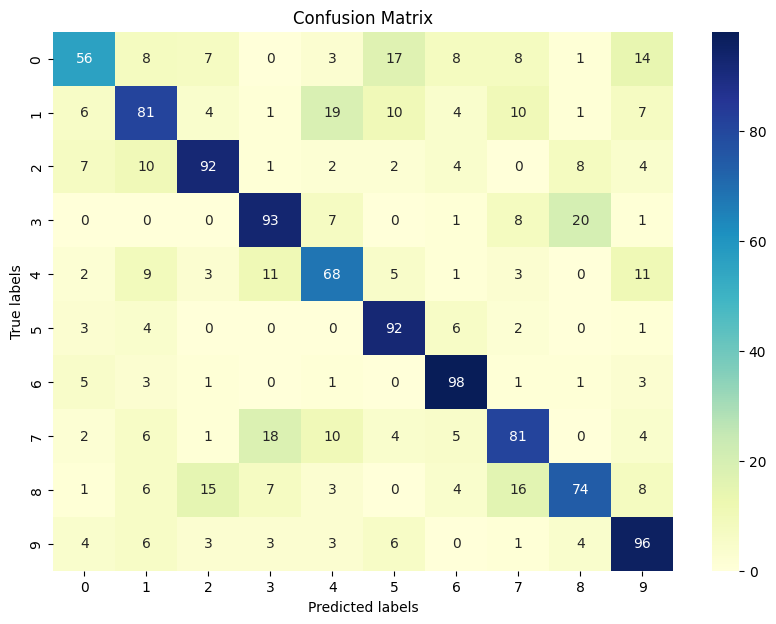

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.46      0.54       122
           1       0.61      0.57      0.59       143
           2       0.73      0.71      0.72       130
           3       0.69      0.72      0.70       130
           4       0.59      0.60      0.59       113
           5       0.68      0.85      0.75       108
           6       0.75      0.87      0.80       113
           7       0.62      0.62      0.62       131
           8       0.68      0.55      0.61       134
           9       0.64      0.76      0.70       126

    accuracy                           0.66      1250
   macro avg       0.66      0.67      0.66      1250
weighted avg       0.66      0.66      0.66      1250

Accuracy: 0.6648


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = grid_search_1.best_estimator_.predict(X_test)
# Print raw confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


In [21]:
import pickle

# Assuming you've already executed the grid search as in your code
best_model = grid_search_1.best_estimator_

# Dump the best model into a .pkl file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)